Import libraries

In [1]:
import random
import collections
import numpy as np  
from pprint import pprint 
import matplotlib.pyplot as plt 

from config import * 
from utils import get_all_spectra

Define some helper functions

Get the number of repeated MS for the same experimental settings. Experimental hyper-parameters considered include: 
1. Adduct 
2. Collision energy 
3. Instrument

In [2]:
def get_n_repeat(data):

    counts = {} 

    for r in data: 
        inchikey = r.metadata["inchikey"][:14]
        adduct = r.metadata["adduct"]
        energy = r.metadata["collision_energy"]
        instrument = r.metadata["instrument_type"]

        key = f"{inchikey}_{adduct}_{energy}_{instrument}"

        if key not in counts: counts[key] = 0 
        counts[key] += 1 
    
    return counts

Get the necessary breakdowns

In [3]:
def get_statistics(data, subset = None):
    
    if subset is not None: data = [r for r in data if r.metadata["dataset"] == subset]
    data_stats = {}

    # Get the first 14 characters of the molecules
    inchikey_no_stero = [r.metadata["inchikey"][:14] for r in data]
    unique_inchikey_breakdown = collections.Counter(inchikey_no_stero)

    # Get the instruments breakdown 
    instruments = [r.metadata["instrument_type"] for r in data]
    unique_instruments_breakdown = collections.Counter(instruments)

    # Get the adduct breakdown 
    adducts = [r.metadata["adduct"] for r in data]
    unique_adducts_breakdown = collections.Counter(adducts)

    # Get the energy breakdown 
    energies = [r.metadata["collision_energy"] for r in data]
    energy_breakdown = collections.Counter(energies)

    # Get the superclass breakdown 
    superclasses = [r.metadata["superclass"] for r in data]
    superclass_breakdown = collections.Counter(superclasses)

    # Get the molecules breakdown 
    n_repeats = get_n_repeat(data)

    # Update the stats 
    data_stats["n_records"] = len(data)
    data_stats["n_unique_molecules"] = len(unique_inchikey_breakdown)
    data_stats["n_unique_instruments"] = len(unique_instruments_breakdown)
    data_stats["n_unique_adducts"] = len(unique_adducts_breakdown)
    data_stats["n_unique_energy"] = len(energy_breakdown)

    data_stats["inchikey_breakdown"] = unique_inchikey_breakdown
    data_stats["instruments_breakdown"] = unique_instruments_breakdown
    data_stats["adducts_breakdown"] = unique_adducts_breakdown
    data_stats["energy_breakdown"] = energy_breakdown 
    data_stats["superclass_breakdown"] = superclass_breakdown 

    data_stats["n_repeats"] = n_repeats

    return data_stats

0. Read in the dataset

In [4]:
data_path = os.path.join(final_data_folder, "final_data.msp")
data = get_all_spectra(data_path)
if not os.path.exists(plots_folder): os.makedirs(plots_folder)

# Get the unique datasets
unique_datasets = list(set([r.metadata["dataset"] for r in data]))

# Get the statistics for each dataset
data_stats_merged = {} 

for d in unique_datasets:
    data_stats = get_statistics(data, d)
    data_stats_merged[d] = data_stats

# Get the total datasets
data_stats_merged["total"] = get_statistics(data)

177764it [02:19, 1272.40it/s]


1. Get dataset breakdown

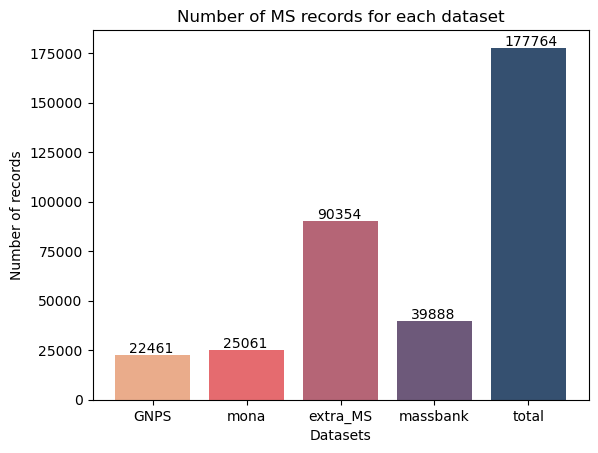

In [18]:
unique_adducts = list(data_stats_merged["total"]["adducts_breakdown"].keys())
unique_datasets = list(data_stats_merged.keys())
unique_instruments = list(data_stats_merged["total"]["instruments_breakdown"].keys())
unique_superclasses = list(data_stats_merged["total"]["superclass_breakdown"].keys())

colors = ["#355070", "#6d597a", "#b56576", "#e56b6f", "#eaac8b"][::-1]
for x, (k, i) in enumerate(data_stats_merged.items()):

    c = i["n_records"] 
    plt.bar(k, c, color = colors[x])
    plt.text(x - 0.25, c + 1000, c)

plt.xlabel("Datasets")
plt.ylabel("Number of records")
plt.title("Number of MS records for each dataset")
plt.savefig(os.path.join(plots_folder, "dataset_breakdown.jpg"), bbox_inches='tight')

2. Get breakdown of adducts

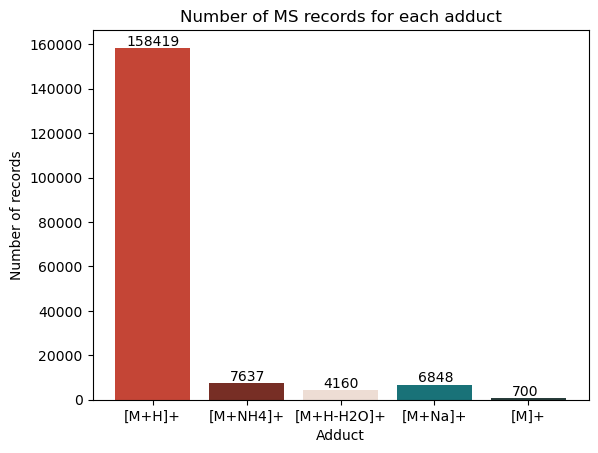

In [17]:
total_adducts = data_stats_merged["total"]["adducts_breakdown"]
colors = ["#c44536", "#772e25", "#edddd4", "#197278", "#283d3b"]

for x, (k, c) in enumerate(total_adducts.items()):

    plt.bar(k, c, color = colors[x])
    offset = 0.18
    if c > 10000: offset = 0.28
    plt.text(x - offset, c + 1000, c)

plt.xlabel("Adduct")
plt.ylabel("Number of records")
plt.title("Number of MS records for each adduct")
plt.savefig(os.path.join(plots_folder, "adducts_total.jpg"), bbox_inches='tight')

In [12]:
for i, a in enumerate(unique_adducts):

    print(a + ":")

    for d in unique_datasets:
        print(d, ":", data_stats_merged[d]["adducts_breakdown"][a])
    print("*" * 80)
    print()


[M+H]+:
GNPS : 16117
mona : 24703
extra_MS : 78327
massbank : 39272
total : 158419
********************************************************************************

[M+NH4]+:
GNPS : 178
mona : 84
extra_MS : 7280
massbank : 95
total : 7637
********************************************************************************

[M+H-H2O]+:
GNPS : 867
mona : 76
extra_MS : 3131
massbank : 86
total : 4160
********************************************************************************

[M+Na]+:
GNPS : 5299
mona : 191
extra_MS : 1053
massbank : 305
total : 6848
********************************************************************************

[M]+:
GNPS : 0
mona : 7
extra_MS : 563
massbank : 130
total : 700
********************************************************************************



3. Get breakdown of instruments

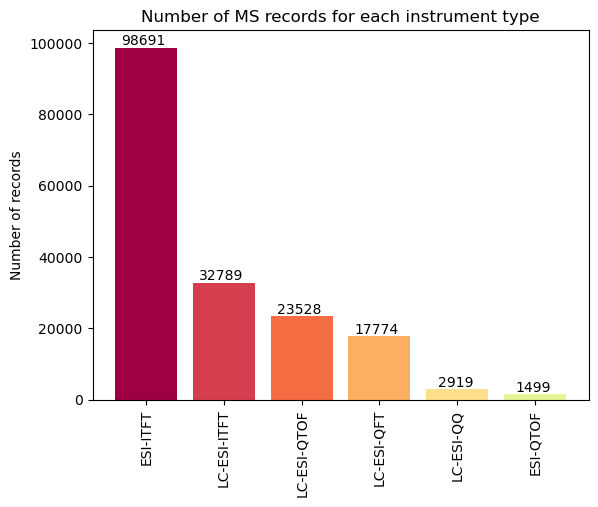

In [19]:
total_instruments = data_stats_merged["total"]["instruments_breakdown"]
total_instruments = {k : v for k, v in total_instruments.items() if v > 1000}
total_instruments = sorted(total_instruments.items(), key=lambda item: item[1], reverse = True)
total_instruments = dict(total_instruments)

colors = ["#9e0142", "#d53e4f", "#f46d43", "#fdae61", "#fee08b", "#e6f598",
          "#abdda4", "#66c2a5", "#3288bd", "#5e4fa2"] 
          
for x, (k, c) in enumerate(total_instruments.items()):

    plt.bar(k, c, color = colors[x])
    offset = 0.25
    if c > 10000: offset = 0.32
    plt.text(x - offset, c + 700, c)

plt.xticks(rotation = 90)
plt.ylabel("Number of records")
plt.title("Number of MS records for each instrument type")
plt.savefig(os.path.join(plots_folder, "instrument_type_total.jpg"), bbox_inches='tight')

In [14]:
for i, a in enumerate(unique_instruments):

    print(a + ":")

    for d in unique_datasets:
        print(d, ":", data_stats_merged[d]["instruments_breakdown"][a])
    print("*" * 80)
    print()

ESI-ITFT:
GNPS : 8291
mona : 25
extra_MS : 90354
massbank : 21
total : 98691
********************************************************************************

LC-ESI-QQ:
GNPS : 0
mona : 1325
extra_MS : 0
massbank : 1594
total : 2919
********************************************************************************

ESI-QTOF:
GNPS : 0
mona : 29
extra_MS : 0
massbank : 1470
total : 1499
********************************************************************************

LC-ESI-ITFT:
GNPS : 14076
mona : 8549
extra_MS : 0
massbank : 10164
total : 32789
********************************************************************************

LC-ESI-QFT:
GNPS : 0
mona : 8522
extra_MS : 0
massbank : 9252
total : 17774
********************************************************************************

APCI-ITFT:
GNPS : 0
mona : 68
extra_MS : 0
massbank : 62
total : 130
********************************************************************************

LC-ESI-QTOF:
GNPS : 94
mona : 6447
extra_MS : 0
massbank : 

4. Get breakdown of classes

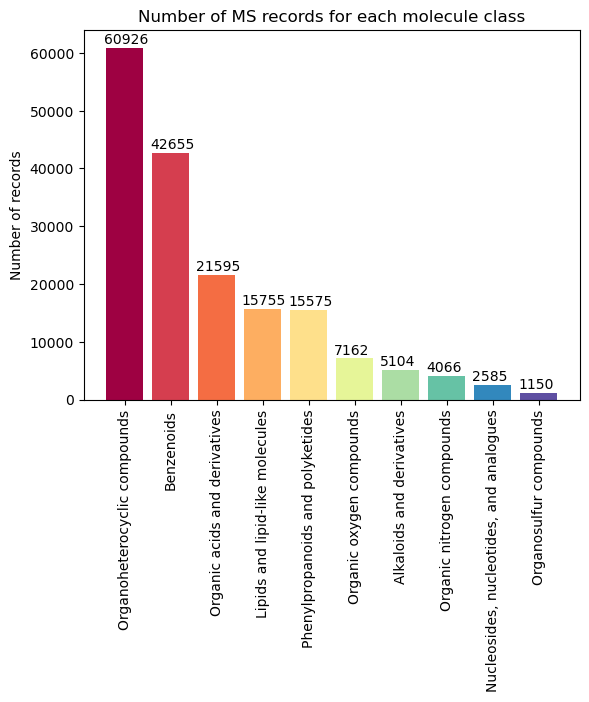

In [20]:
total_superclasses = data_stats_merged["total"]["superclass_breakdown"]
total_superclasses = {k : v for k, v in total_superclasses.items() if v > 1000}
total_superclasses = sorted(total_superclasses.items(), key=lambda item: item[1], reverse = True)
total_superclasses = dict(total_superclasses)

colors = ["#9e0142", "#d53e4f", "#f46d43", "#fdae61", "#fee08b", "#e6f598",
          "#abdda4", "#66c2a5", "#3288bd", "#5e4fa2"] 

for x, (k, c) in enumerate(total_superclasses.items()):

    plt.bar(k, c, color = colors[x])
    offset = -0.05
    if c > 1000: offset = 0.45
    plt.text(x - offset, c + 700, c)

plt.xticks(rotation = 90)
plt.ylabel("Number of records")
plt.title("Number of MS records for each molecule class")
plt.savefig(os.path.join(plots_folder, "molecule_class_total.jpg"), bbox_inches='tight')

In [16]:
for i, a in enumerate(unique_superclasses):

    print(a + ":")

    for d in unique_datasets:
        print(d, ":", data_stats_merged[d]["superclass_breakdown"][a])
    print("*" * 80)
    print()

Phenylpropanoids and polyketides:
GNPS : 3606
mona : 2096
extra_MS : 7770
massbank : 2103
total : 15575
********************************************************************************

Lignans, neolignans and related compounds:
GNPS : 79
mona : 109
extra_MS : 529
massbank : 73
total : 790
********************************************************************************

Organic oxygen compounds:
GNPS : 1017
mona : 944
extra_MS : 3690
massbank : 1511
total : 7162
********************************************************************************

Alkaloids and derivatives:
GNPS : 571
mona : 1664
extra_MS : 1165
massbank : 1704
total : 5104
********************************************************************************

Benzenoids:
GNPS : 3096
mona : 7462
extra_MS : 18594
massbank : 13503
total : 42655
********************************************************************************

Organic acids and derivatives:
GNPS : 3730
mona : 2786
extra_MS : 10606
massbank : 4473
total : 21595
******